# AV3 - Resolução de problemas por GAs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import mode

## Hill Climbing

In [44]:
class HillClimber:
    def __init__(self, objective_function, optimization_type, domain, num_rounds, sigma=0.1):
        self.objective_function = objective_function
        self.optimization_type = optimization_type
        self.domain = domain
        self.num_rounds = num_rounds
        self.sigma = sigma
        self.solutions = []

    def run(self, num_iterations=1000):
        for _ in range(self.num_rounds):
            solution = self._hill_climb(num_iterations, self.sigma)
            self.solutions.append(solution)

    def get_solutions(self):
        return self.solutions

    def _hill_climb(self, num_iterations, sigma):
        x_best = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
        f_best = self.objective_function(*x_best)

        for _ in range(num_iterations):
            n = np.random.normal(0, sigma, size=len(x_best))
            x_cand = x_best + n
            x_cand = np.clip(x_cand, [self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
            f_cand = self.objective_function(*x_cand)

            if self.optimization_type == 'minimization' and f_cand < f_best:
                x_best, f_best = x_cand, f_cand
            elif self.optimization_type == 'maximization' and f_cand > f_best:
                x_best, f_best = x_cand, f_cand

        return x_best

    def plot_results(self):
        x1_min, x1_max = self.domain[0]
        x2_min, x2_max = self.domain[1]

        X = np.linspace(x1_min, x1_max, 1000)
        Y = np.linspace(x2_min, x2_max, 1000)
        X, Y = np.meshgrid(X, Y)
        Z = self.objective_function(X, Y)

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel(f'f(x1, x2)')

        if self.optimization_type == 'minimization':
            min_index = np.argmin([self.objective_function(*sol) for sol in self.solutions])
            min_solution = self.solutions[min_index]
            ax.scatter(min_solution[0], min_solution[1], self.objective_function(*min_solution), color='red', s=100, label='Mínimo Encontrado', edgecolors='k')
        elif self.optimization_type == 'maximization':
            max_index = np.argmax([self.objective_function(*sol) for sol in self.solutions])
            max_solution = self.solutions[max_index]
            ax.scatter(max_solution[0], max_solution[1], self.objective_function(*max_solution), color='blue', s=100, label='Máximo Encontrado', edgecolors='k')
        
        plt.title('Resultados do Hill Climber')
        plt.show()

## Local Random Search

In [39]:
class LRS:
    def __init__(self, objective_function, optimization_type, domain, num_rounds, sigma):
        self.objective_function = objective_function
        self.optimization_type = optimization_type
        self.domain = domain
        self.num_rounds = num_rounds
        self.sigma = sigma
        self.solutions = []

    def run(self, num_iterations=1000):
        for _ in range(self.num_rounds):
            solution = self._local_random_search(num_iterations, self.sigma)
            self.solutions.append(solution)

    def get_solutions(self):
        return self.solutions

    def _local_random_search(self, num_iterations, sigma):
        x_best = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
        f_best = self.objective_function(*x_best)

        for _ in range(num_iterations):
            n = np.random.normal(0, sigma, size=len(x_best))  # Perturbação local
            x_cand = x_best + n
            x_cand = np.clip(x_cand, [self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
            f_cand = self.objective_function(*x_cand)

            # Verifica se é uma minimização ou maximização
            if self.optimization_type == 'minimization' and f_cand < f_best:
                x_best, f_best = x_cand, f_cand
            elif self.optimization_type == 'maximization' and f_cand > f_best:
                x_best, f_best = x_cand, f_cand

        return x_best

    def plot_results(self):
        x1_min, x1_max = self.domain[0]
        x2_min, x2_max = self.domain[1]

        X = np.linspace(x1_min, x1_max, 1000)
        Y = np.linspace(x2_min, x2_max, 1000)
        X, Y = np.meshgrid(X, Y)
        Z = self.objective_function(X, Y)

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel(f'f(x1, x2)')

        if self.optimization_type == 'minimization':
            min_index = np.argmin([self.objective_function(*sol) for sol in self.solutions])
            min_solution = self.solutions[min_index]
            ax.scatter(min_solution[0], min_solution[1], self.objective_function(*min_solution), color='red', s=100, label='Mínimo Encontrado', edgecolors='k')
        elif self.optimization_type == 'maximization':
            max_index = np.argmax([self.objective_function(*sol) for sol in self.solutions])
            max_solution = self.solutions[max_index]
            ax.scatter(max_solution[0], max_solution[1], self.objective_function(*max_solution), color='blue', s=100, label='Máximo Encontrado', edgecolors='k')

        ax.legend()
        plt.title('Resultados do LRS')
        plt.show()

## Global Random Search

In [38]:
class GRS:
    def __init__(self, objective_function, optimization_type, domain, num_rounds):
        self.objective_function = objective_function
        self.optimization_type = optimization_type
        self.domain = domain
        self.num_rounds = num_rounds
        self.solutions = []

    def run(self, num_iterations=1000):
        for _ in range(self.num_rounds):
            solution = self._global_random_search(num_iterations)
            self.solutions.append(solution)

    def get_solutions(self):
        return self.solutions

    def _global_random_search(self, num_iterations):
        x_best = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
        f_best = self.objective_function(*x_best)

        for _ in range(num_iterations):
            x_cand = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
            f_cand = self.objective_function(*x_cand)

            if self.optimization_type == 'minimization' and f_cand < f_best:
                x_best, f_best = x_cand, f_cand
            elif self.optimization_type == 'maximization' and f_cand > f_best:
                x_best, f_best = x_cand, f_cand

        return x_best

    def plot_results(self):
        x1_min, x1_max = self.domain[0]
        x2_min, x2_max = self.domain[1]

        X = np.linspace(x1_min, x1_max, 1000)
        Y = np.linspace(x2_min, x2_max, 1000)
        X, Y = np.meshgrid(X, Y)
        Z = self.objective_function(X, Y)

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel(f'f(x1, x2)')

        if self.optimization_type == 'minimization':
            min_index = np.argmin([self.objective_function(*sol) for sol in self.solutions])
            min_solution = self.solutions[min_index]
            ax.scatter(min_solution[0], min_solution[1], self.objective_function(*min_solution), color='red', s=100, label='Mínimo Encontrado', edgecolors='k')
        elif self.optimization_type == 'maximization':
            max_index = np.argmax([self.objective_function(*sol) for sol in self.solutions])
            max_solution = self.solutions[max_index]
            ax.scatter(max_solution[0], max_solution[1], self.objective_function(*max_solution), color='blue', s=100, label='Máximo Encontrado', edgecolors='k')

        ax.legend()
        plt.title('Resultados do GRS')
        plt.show()

## Parte 1 - Minimizações e Maximizações

In [47]:
def print_final_metrics(hc, lrs, grs):
    hc_solutions = hc.get_solutions()
    lrs_solutions = lrs.get_solutions()
    grs_solutions = grs.get_solutions()

    hc_solutions = np.array(hc_solutions)
    lrs_min_solutions = np.array(lrs_solutions)
    grs_max_solutions = np.array(grs_solutions)

    df = pd.DataFrame({
        'HC': hc_solutions[:, 0],
        'LRS': lrs_min_solutions[:, 0],
        'GRS': grs_max_solutions[:, 0]
    })
    print(df.describe())

### Q1 - 1

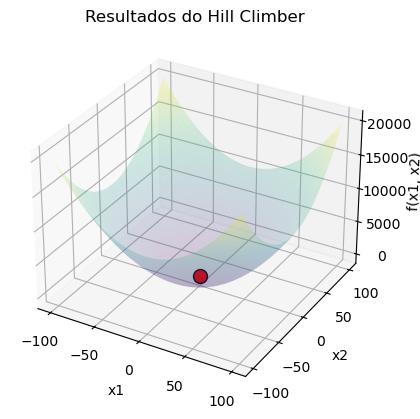

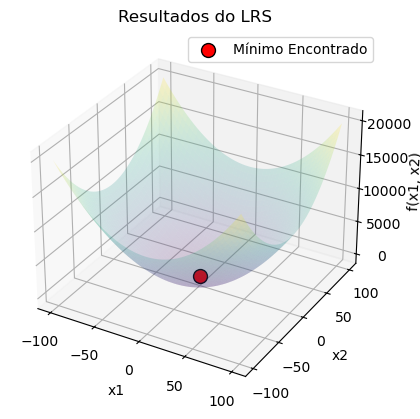

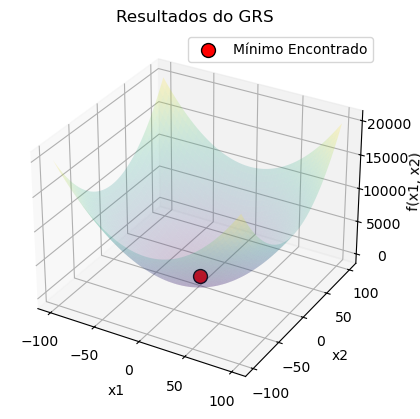

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean    -2.235167    5.864792    0.051998
std     35.830374   31.849829    2.506967
min    -71.572568  -59.046822   -5.659582
25%    -28.429726   -8.043120   -1.687729
50%     -0.000448    0.038367   -0.122264
75%     18.142536   31.056085    1.589062
max     63.349922   71.482772    7.130441


In [48]:
def f(x1, x2):
    return x1**2 + x2**2

num_rounds = 100
optimization_type = 'minimization'
domain = [(-100, 100), (-100, 100)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

### Q1 - 2

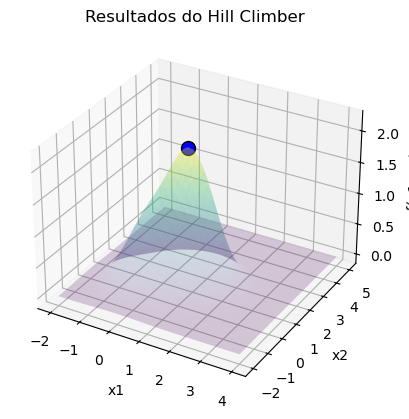

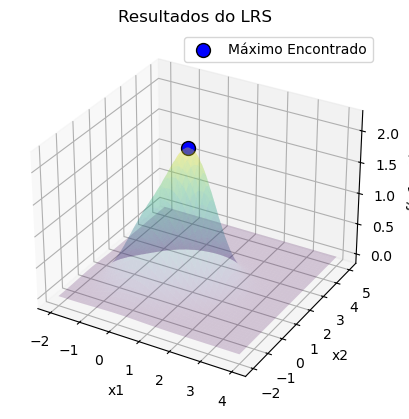

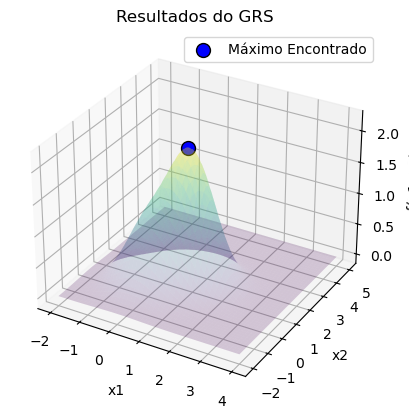

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean     0.912315    0.911890    0.916269
std      0.003499    0.003706    0.073459
min      0.903640    0.902769    0.714903
25%      0.909777    0.909541    0.870185
50%      0.912667    0.911457    0.909555
75%      0.915059    0.914368    0.966293
max      0.922459    0.921474    1.120682


In [49]:
def f(x1, x2):
    return np.exp(-(x1**2 + x2**2)) + 2*np.exp(-((x1 - 1)**2 + (x2 - 1)**2))

num_rounds = 100
optimization_type = 'maximization'
domain = [(-2, 4), (-2, 5)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

### Q1 - 3

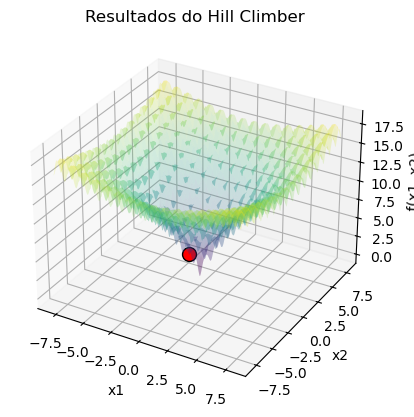

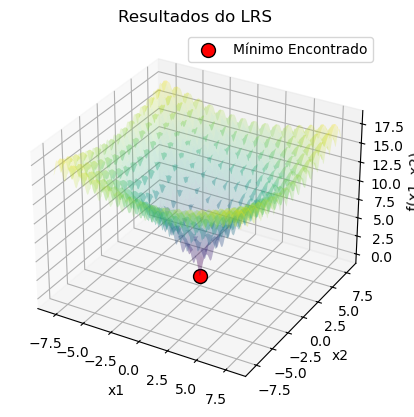

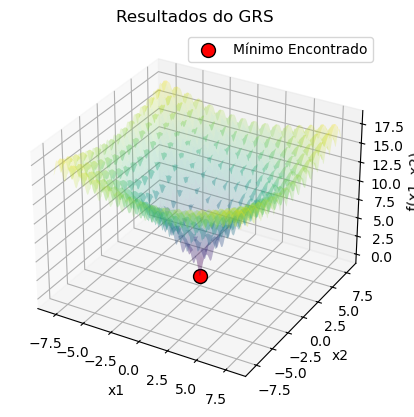

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean     0.242067   -0.249347   -0.011577
std      4.836996    4.671267    0.294835
min     -7.996026   -7.991233   -1.127832
25%     -3.972978   -4.229907   -0.140514
50%     -0.001037   -0.477327   -0.026685
75%      4.986182    3.970339    0.122792
max      7.986774    8.000000    1.043196


In [50]:
def f(x1, x2):
    return -20 * np.exp(-0.2*np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))) + 20 + np.exp(1)

num_rounds = 100
optimization_type = 'minimization'
domain = [(-8, 8), (-8,8)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

### Q1 - 4

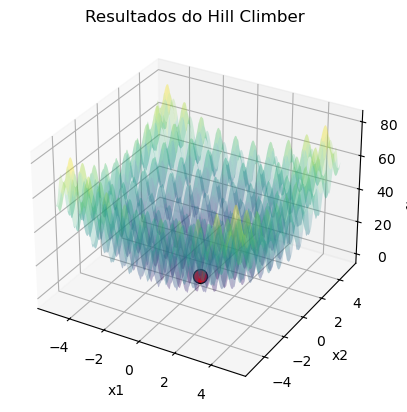

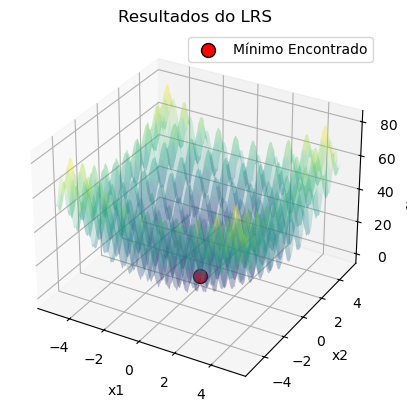

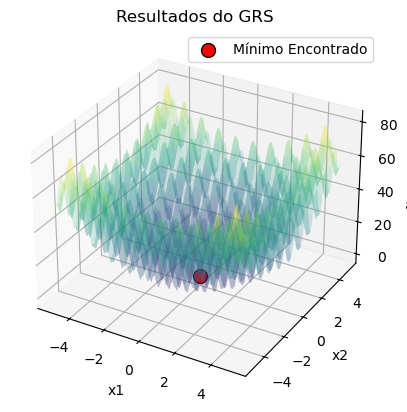

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean     0.875087   -0.567006    0.110222
std      2.661805    2.997430    0.735101
min     -4.979786   -4.980233   -1.075841
25%     -0.994278   -2.985884   -0.058988
50%      0.993033   -0.994338    0.022988
75%      2.985138    1.991398    0.942751
max      4.978446    4.980057    1.984750


In [51]:
def f(x1, x2):
    return (x1**2 - 10 * np.cos(2 * np.pi * x1) + 10) + (x2**2 - 10 * np.cos(2 * np.pi * x2) + 10)

num_rounds = 100
optimization_type = 'minimization'
domain = [(-5.12, 5.12), (-5.12, 5.12)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

### Q1 - 5

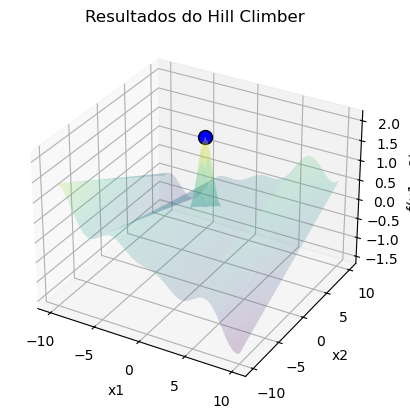

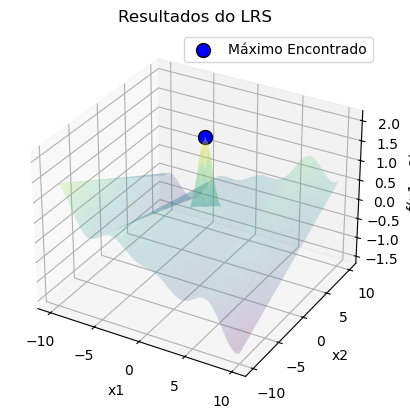

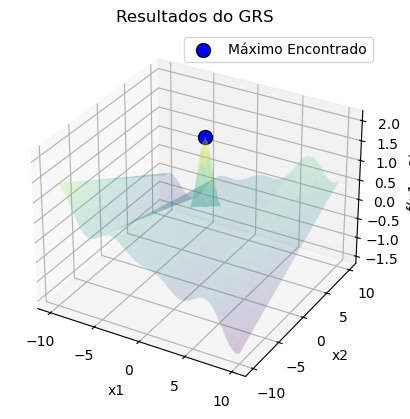

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean    -0.278365   -1.036821   -0.240886
std      6.437989    6.297326    1.688002
min     -9.734761   -9.734235   -9.879996
25%     -3.910597   -3.911033   -0.089795
50%     -3.909389   -3.910061    0.032321
75%      6.728888    6.728952    0.190950
max     10.000000   10.000000    0.535522


In [52]:
def f(x1, x2):
    return (x1 * np.cos(x1))/20 + 2 * np.exp(-(x1)**2 - (x2 - 1)**2) + 0.01 * x1 * x2

num_rounds = 100
optimization_type = 'maximization'
domain = [(-10, 10), (-10, 10)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

### Q1 - 6

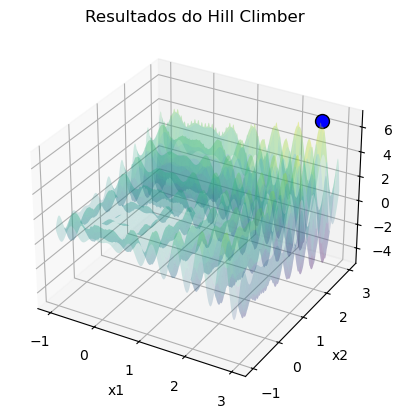

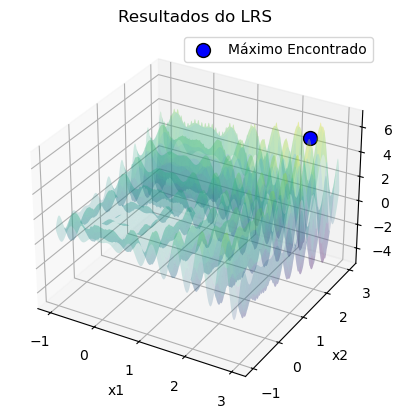

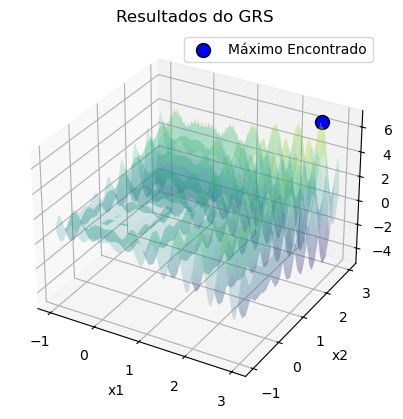

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean     1.164270    1.064394    2.536763
std      1.192536    1.174089    0.209265
min     -0.640290   -0.639269    1.592508
25%      0.156942   -0.156655    2.592441
50%      1.135866    1.130019    2.616248
75%      2.129966    2.127738    2.644000
max      2.631931    2.634599    2.702955


In [53]:
def f(x1, x2):
    return x1 * np.sin(4 * np.pi * x1) - x2 * np.sin(4 * np.pi * x2) + 1

num_rounds = 100
optimization_type = 'maximization'
domain = [(-1, 3), (-1, 3)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

### Q1 - 7

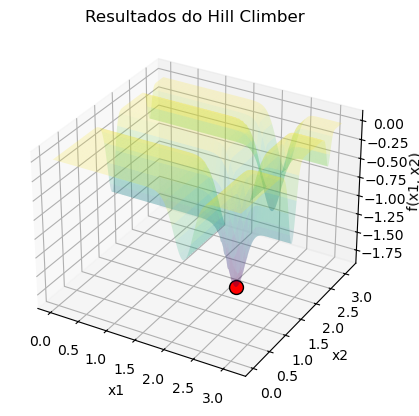

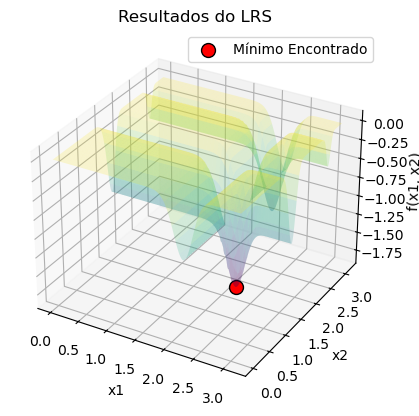

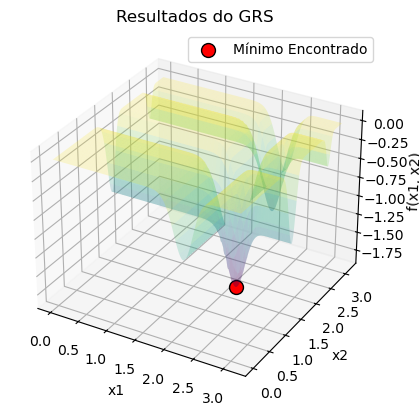

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean     1.661706    1.671624    2.198871
std      0.811101    0.841812    0.054616
min      0.000000    0.000000    2.021887
25%      0.821031    0.752026    2.157495
50%      2.200964    2.201390    2.198890
75%      2.203007    2.204947    2.233210
max      3.085556    3.086996    2.331871


In [54]:
def f(x1, x2):
    return -np.sin(x1) * np.sin(x1**2 / np.pi)**20 - np.sin(x2) * np.sin(2 * x2**2 / np.pi)**20

num_rounds = 100
optimization_type = 'minimization'
domain = [(0, np.pi), (0, np.pi)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

### Q1 - 8

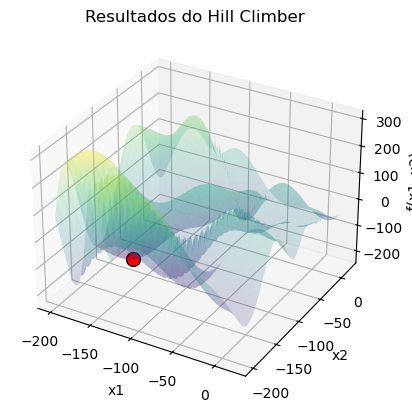

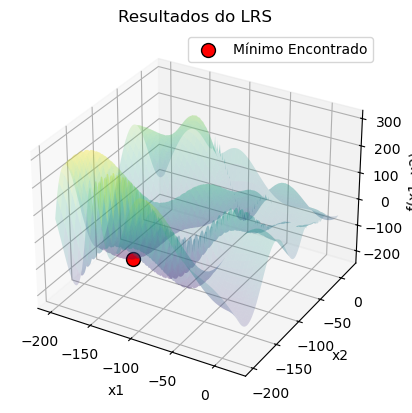

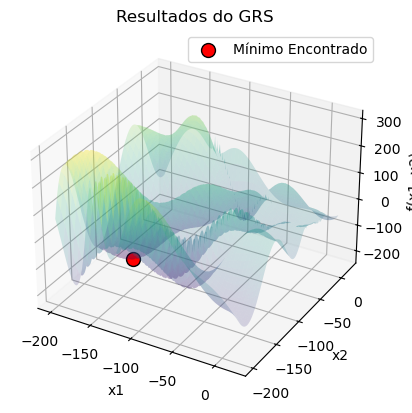

               HC         LRS         GRS
count  100.000000  100.000000  100.000000
mean   -97.036336  -97.251770 -170.588269
std     61.530315   66.783901    3.260976
min   -200.000000 -200.000000 -179.680100
25%   -147.178202 -165.112658 -172.835994
50%   -101.291945  -96.842542 -170.469952
75%    -48.930597  -33.379658 -168.037874
max     20.000000    8.467740 -163.502106


In [55]:
def f(x1, x2):
    return  -(x2 + 47) * np.sin(np.sqrt(np.abs(x1/2 + (x2 + 47)))) - x1 * np.sin(np.sqrt(np.abs(x1 - (x2 + 47))))

num_rounds = 100
optimization_type = 'minimization'
domain = [(-200, 20), (-200, 20)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

print_final_metrics(hill_climber, lrs_min, grs_max)

## Parte 2 - Oito Rainhas

Nova solução encontrada: [3, 6, 8, 2, 4, 1, 7, 5]


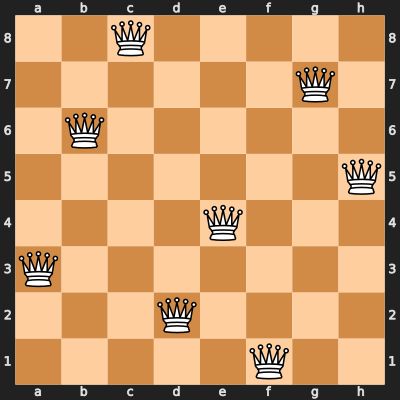

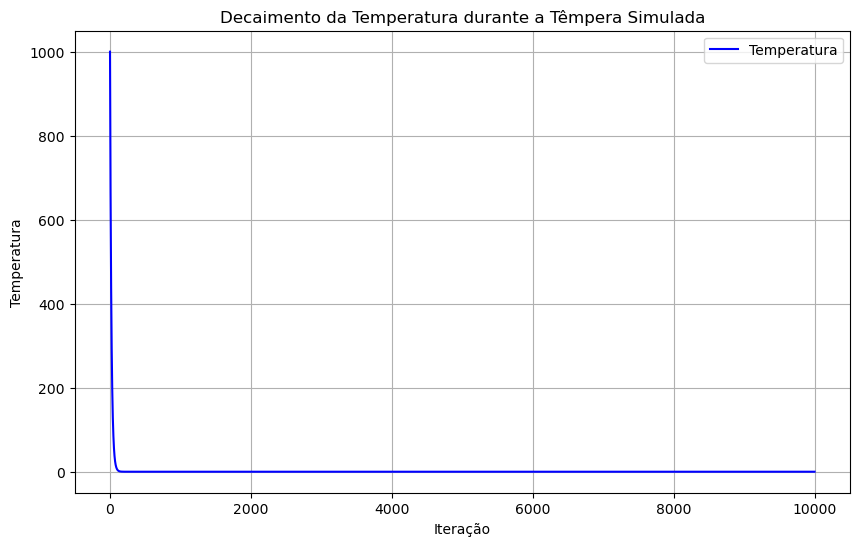

Total de soluções encontradas: 1
Nova solução encontrada: [5, 7, 1, 3, 8, 6, 4, 2]


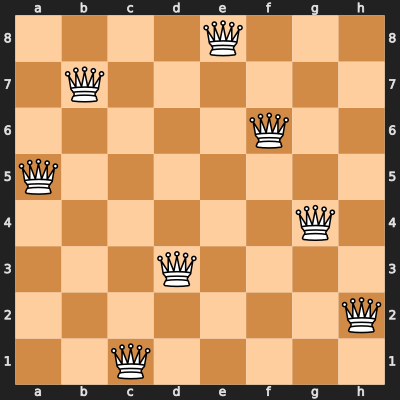

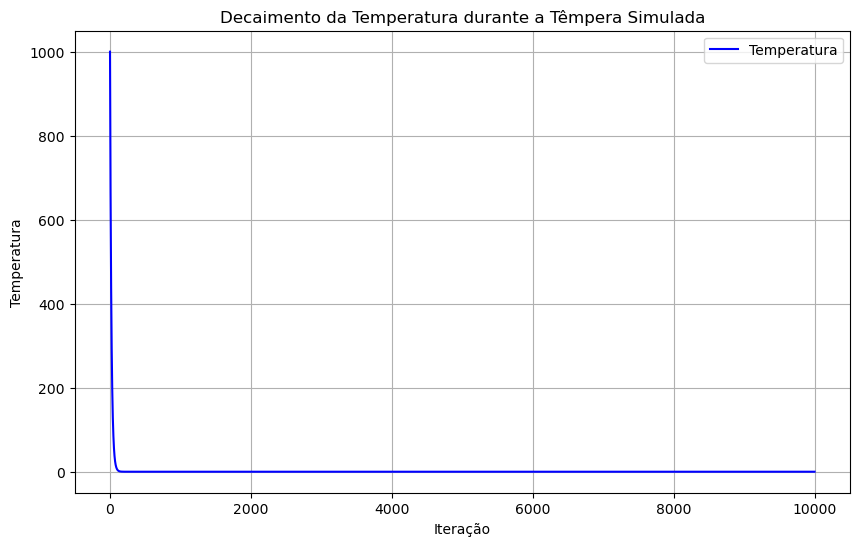

Total de soluções encontradas: 2
Nova solução encontrada: [3, 6, 4, 2, 8, 5, 7, 1]


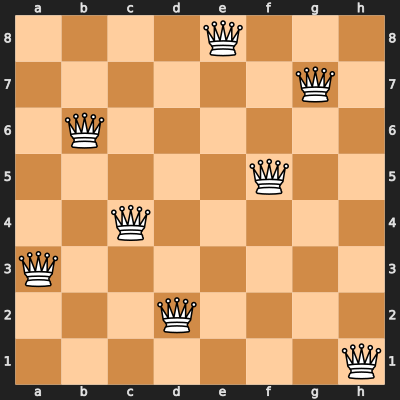

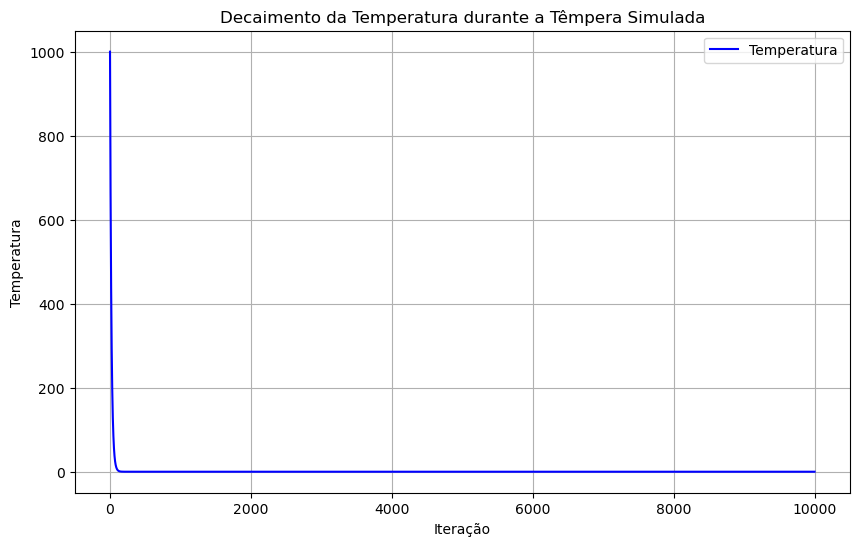

Total de soluções encontradas: 3
Nova solução encontrada: [4, 1, 5, 8, 2, 7, 3, 6]


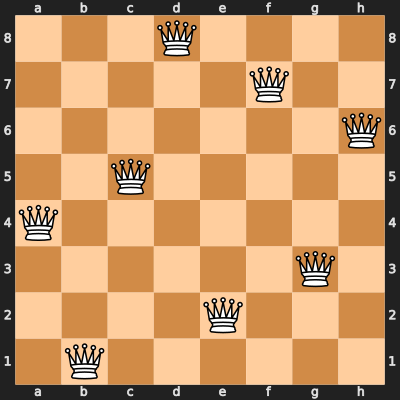

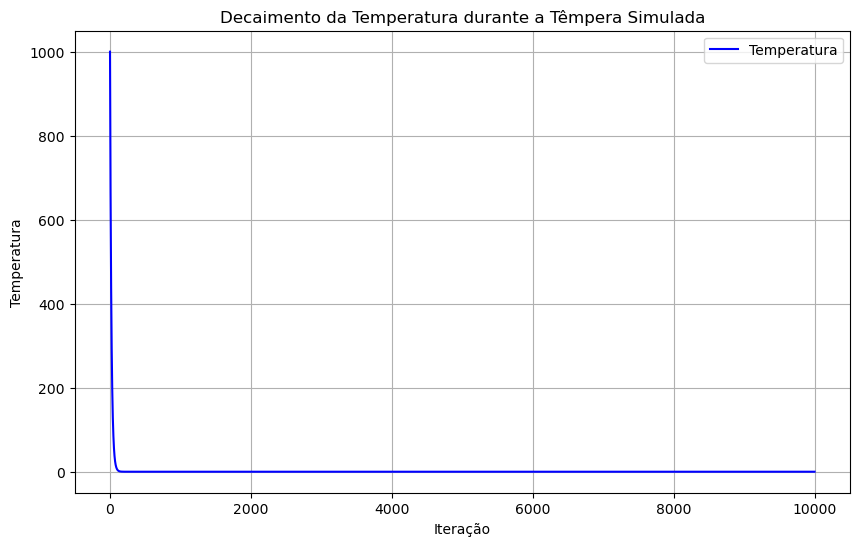

Total de soluções encontradas: 4
Nova solução encontrada: [2, 4, 6, 8, 3, 1, 7, 5]


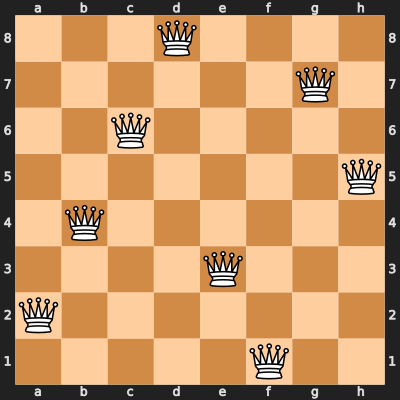

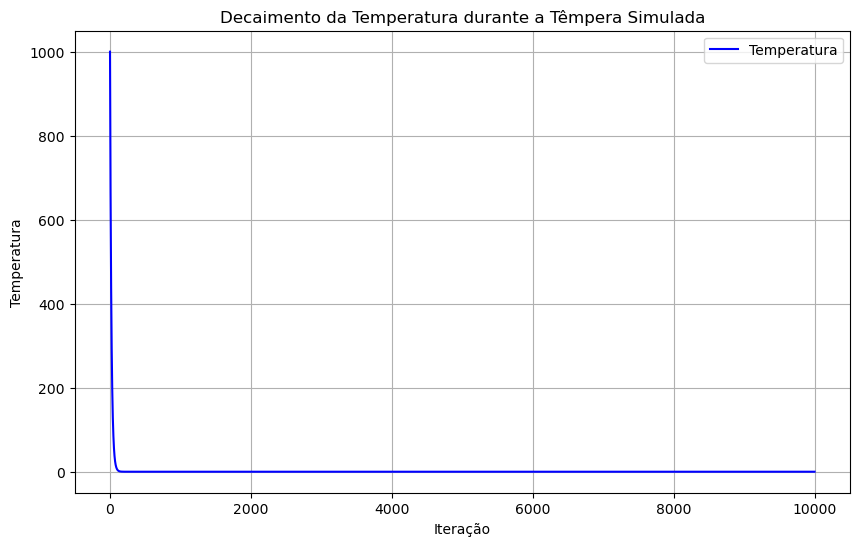

Total de soluções encontradas: 5
Nova solução encontrada: [4, 2, 8, 6, 1, 3, 5, 7]


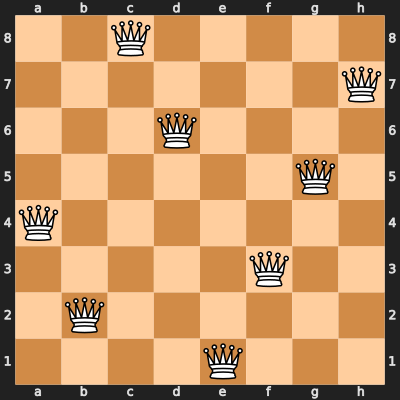

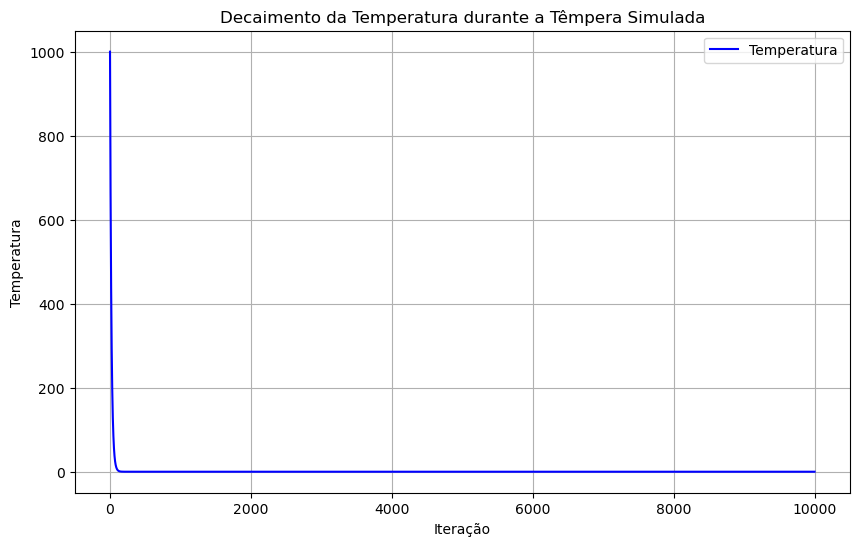

Total de soluções encontradas: 6
Nova solução encontrada: [6, 3, 7, 4, 1, 8, 2, 5]


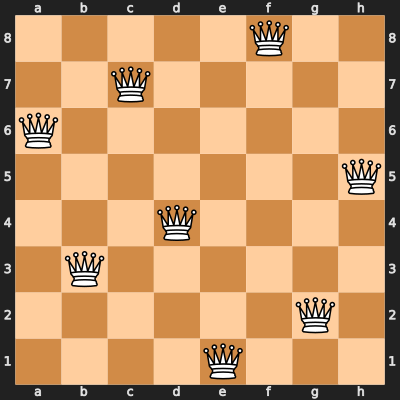

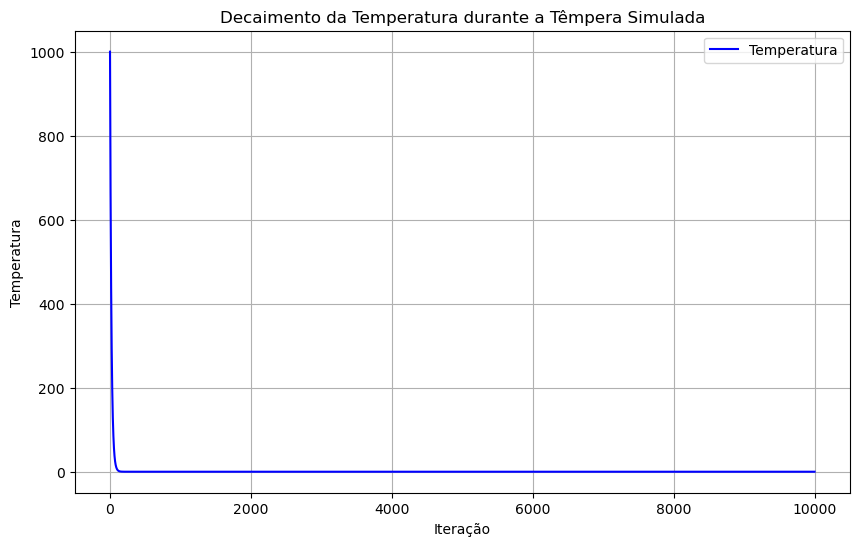

Total de soluções encontradas: 7


KeyboardInterrupt: 

In [18]:
import random
import math
import matplotlib.pyplot as plt
import chess
import chess.svg
from IPython.display import SVG, display

def mostrar_tabuleiro(solucao):
    board = chess.Board()
    board.clear()
    
    for coluna, linha in enumerate(solucao):
        board.set_piece_at(chess.square(coluna, linha - 1), chess.Piece(chess.QUEEN, chess.WHITE))
    
    display(SVG(chess.svg.board(board=board, size=400)))

def funcao_avaliacao(x):
    n = len(x)
    ataques = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            if x[i] == x[j] or abs(x[i] - x[j]) == abs(i - j):
                ataques += 1
                
    return 28 - ataques

def decaimento_temperatura(temperatura, taxa_decaimento=0.95):
    return temperatura * taxa_decaimento

def perturbar_solucao(solucao):
    nova_solucao = solucao[:]
    i, j = random.sample(range(len(solucao)), 2)
    nova_solucao[i], nova_solucao[j] = nova_solucao[j], nova_solucao[i]
    return nova_solucao

def tempera_simulada(temperatura_inicial, num_iteracoes, taxa_decaimento):
    solucao_atual = [random.randint(1, 8) for _ in range(8)]
    melhor_solucao = solucao_atual[:]
    melhor_aptidao = funcao_avaliacao(melhor_solucao)
    temperatura = temperatura_inicial

    temperaturas = []

    for _ in range(num_iteracoes):
        temperaturas.append(temperatura)
        
        nova_solucao = perturbar_solucao(solucao_atual)
        nova_aptidao = funcao_avaliacao(nova_solucao)
        delta_aptidao = nova_aptidao - funcao_avaliacao(solucao_atual)
        
        if delta_aptidao > 0 or random.random() < math.exp(delta_aptidao / temperatura):
            solucao_atual = nova_solucao
        
        if funcao_avaliacao(solucao_atual) > melhor_aptidao:
            melhor_solucao = solucao_atual[:]
            melhor_aptidao = funcao_avaliacao(melhor_solucao)
        
        temperatura = decaimento_temperatura(temperatura, taxa_decaimento)
    
    return melhor_solucao, melhor_aptidao, temperaturas

def encontrar_solucoes_unicas():
    todas_solucoes = set()
    temperatura_inicial = 1000
    num_iteracoes = 10000
    taxa_decaimento = 0.95

    while len(todas_solucoes) < 92:
        solucao, aptidao, temperaturas = tempera_simulada(temperatura_inicial, num_iteracoes, taxa_decaimento)
        if aptidao == 28:
            solucao_tupla = tuple(solucao)
            if solucao_tupla not in todas_solucoes:
                todas_solucoes.add(solucao_tupla)
                print(f"Nova solução encontrada: {solucao}")
                mostrar_tabuleiro(solucao)
                plt.figure(figsize=(10, 6))
                plt.plot(temperaturas, label='Temperatura', color='blue')
                plt.xlabel('Iteração')
                plt.ylabel('Temperatura')
                plt.title('Decaimento da Temperatura durante a Têmpera Simulada')
                plt.legend()
                plt.grid(True)
                plt.show()
                print(f"Total de soluções encontradas: {len(todas_solucoes)}")
    
    return todas_solucoes

todas_solucoes = encontrar_solucoes_unicas()

print("Total de 92 soluções encontradas:")
for solucao in todas_solucoes:
    print(solucao)


## Parte 3 - O Problema do Drone Viajante

In [13]:
def calcular_custo(rotacao, pontos):
    custo = 0.0
    for i in range(len(rotacao)):
        if i == len(rotacao) - 1:
            custo += np.linalg.norm(np.array(pontos[rotacao[i]]) - np.array(pontos[rotacao[0]]))
        else:
            custo += np.linalg.norm(np.array(pontos[rotacao[i]]) - np.array(pontos[rotacao[i + 1]]))
    return custo

def torneio(populacao, custos, k=5):
    selecionados = random.sample(range(len(populacao)), k)
    melhor = min(selecionados, key=lambda idx: custos[idx])
    return populacao[melhor]

def cruzamento(pai1, pai2):
    size = len(pai1)
    ponto1, ponto2 = sorted(random.sample(range(size), 2))
    
    filho1 = [None] * size
    filho2 = [None] * size
    
    filho1[ponto1:ponto2] = pai1[ponto1:ponto2]
    filho2[ponto1:ponto2] = pai2[ponto1:ponto2]
    
    def preencher_filho(filho, pai, ponto1, ponto2):
        fill_point = ponto2
        for gene in pai:
            if gene not in filho:
                while filho[fill_point] is not None:
                    fill_point = (fill_point + 1) % size
                filho[fill_point] = gene
        return filho
    
    filho1 = preencher_filho(filho1, pai2, ponto1, ponto2)
    filho2 = preencher_filho(filho2, pai1, ponto1, ponto2)
    
    return filho1, filho2

def mutacao(rotacao, taxa_mutacao=0.01):
    if random.random() < taxa_mutacao:
        ponto1, ponto2 = sorted(random.sample(range(len(rotacao)), 2))
        rotacao[ponto1:ponto2] = reversed(rotacao[ponto1:ponto2])
    return rotacao

def inicializar_populacao(tamanho_pop, pontos):
    populacao = []
    for _ in range(tamanho_pop):
        individuo = list(range(1, len(pontos)))
        random.shuffle(individuo)
        populacao.append(individuo)
    return populacao

def algoritmo_genetico(pontos, tamanho_pop=100, geracoes=1000, taxa_mutacao=0.01, elitismo=5):
    melhor_custo = float('inf')
    melhor_rotacao = None
    
    populacao = inicializar_populacao(tamanho_pop, pontos)
    custos = [calcular_custo([0] + ind + [0], pontos) for ind in populacao]
    
    melhores_custos_por_geracao = []

    for geracao in range(geracoes):
        nova_populacao = []
        
        elites = sorted(range(tamanho_pop), key=lambda idx: custos[idx])[:elitismo]
        for elite in elites:
            nova_populacao.append(populacao[elite])
        
        while len(nova_populacao) < tamanho_pop:
            pai1 = torneio(populacao, custos)
            pai2 = torneio(populacao, custos)
            while pai2 == pai1:
                pai2 = torneio(populacao, custos)
            
            filho1, filho2 = cruzamento(pai1, pai2)
            filho1 = mutacao(filho1, taxa_mutacao)
            filho2 = mutacao(filho2, taxa_mutacao)
            
            nova_populacao.append(filho1)
            if len(nova_populacao) < tamanho_pop:
                nova_populacao.append(filho2)
        
        populacao = nova_populacao
        custos = [calcular_custo([0] + ind + [0], pontos) for ind in populacao]
        
        min_custo = min(custos)
        melhores_custos_por_geracao.append(min_custo)

        if min_custo < melhor_custo:
            melhor_custo = min_custo
            melhor_rotacao = populacao[custos.index(min_custo)]
    
    return melhor_custo, melhor_rotacao, melhores_custos_por_geracao

In [ ]:
def main():
    pontos = pd.read_csv('./data/CaixeiroSimples.csv', header=None).values.tolist()
    
    melhores_resultados = []
    for _ in range(100):
        melhor_custo, _, _ = algoritmo_genetico(pontos)
        print(f"Melhor custo encontrado: {melhor_custo}")
        melhores_resultados.append(melhor_custo)
    
    menor_valor = min(melhores_resultados)
    maior_valor = max(melhores_resultados)
    media_valor = np.mean(melhores_resultados)
    desvio_padrao_valor = np.std(melhores_resultados)
    
    print(f"Menor valor de aptidão: {menor_valor}")
    print(f"Maior valor de aptidão: {maior_valor}")
    print(f"Média de valores de aptidão: {media_valor}")
    print(f"Desvio-padrão de valores de aptidão: {desvio_padrao_valor}")

if __name__ == "__main__":
    main()

Melhor custo encontrado: 1037.4692820944135
Melhor rota: [0, 72, 1, 64, 16, 25, 20, 53, 84, 89, 82, 48, 69, 65, 36, 31, 4, 27, 44, 42, 30, 6, 57, 100, 76, 88, 54, 85, 39, 93, 37, 18, 8, 79, 97, 77, 55, 59, 40, 12, 21, 22, 10, 43, 23, 66, 58, 86, 38, 90, 17, 49, 63, 5, 80, 35, 28, 34, 71, 56, 92, 91, 15, 74, 83, 68, 96, 19, 62, 99, 2, 87, 52, 47, 33, 50, 24, 95, 98, 81, 67, 60, 7, 41, 29, 94, 73, 61, 11, 13, 45, 14, 46, 75, 26, 70, 51, 32, 78, 9, 3, 0]


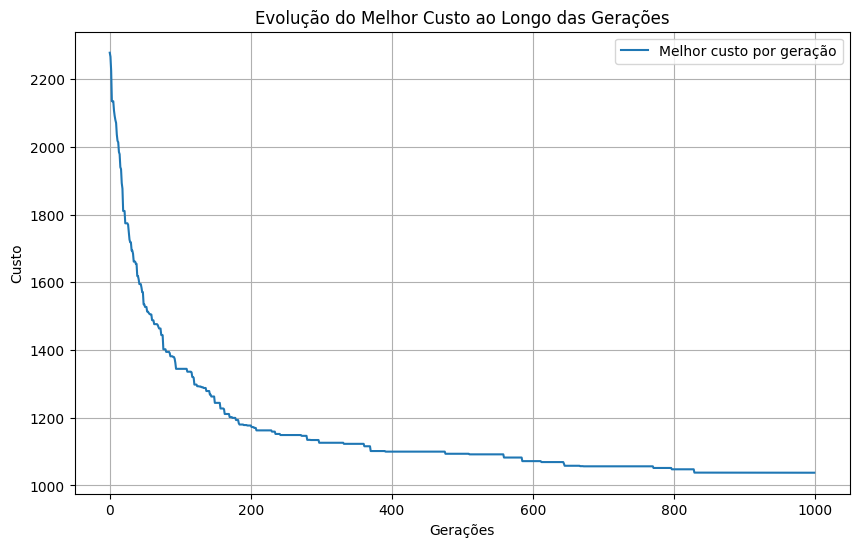

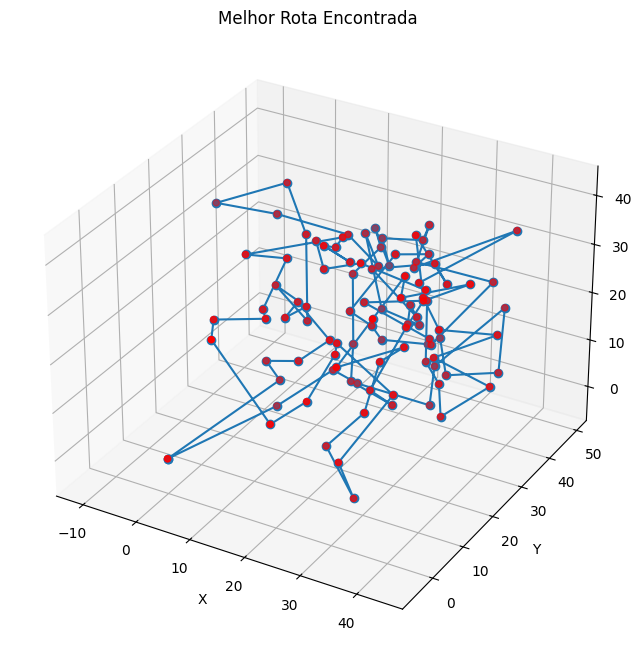

In [14]:
def main():
    pontos = pd.read_csv('./data/CaixeiroSimples.csv', header=None).values.tolist()
    
    melhor_custo, melhor_rotacao, melhores_custos_por_geracao = algoritmo_genetico(pontos)
    
    print(f"Melhor custo encontrado: {melhor_custo}")
    print(f"Melhor rota: {[0] + melhor_rotacao + [0]}")

    plt.figure(figsize=(10, 6))
    plt.plot(melhores_custos_por_geracao, label='Melhor custo por geração')
    plt.xlabel('Gerações')
    plt.ylabel('Custo')
    plt.title('Evolução do Melhor Custo ao Longo das Gerações')
    plt.legend()
    plt.grid(True)
    plt.show()

    melhor_rota_completa = [0] + melhor_rotacao + [0]
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    x_coords = [pontos[i][0] for i in melhor_rota_completa]
    y_coords = [pontos[i][1] for i in melhor_rota_completa]
    z_coords = [pontos[i][2] for i in melhor_rota_completa]

    ax.plot(x_coords, y_coords, z_coords, marker='o')
    ax.scatter(x_coords, y_coords, z_coords, c='r', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Melhor Rota Encontrada')
    plt.show()

if __name__ == "__main__":
    main()
